# IRIS Dataset

## Dataset Information

https://archive.ics.uci.edu/ml/datasets/Iris

The Iris (aka. Fisher's) dataset is one of the most used referenced datasets due to its simplicity and understandibility.
It contains 150 records, separated into 3 different classes, where each class represents all measured individuals
of one specific type of iris plant. 

### Attributes

Each record has 5 attributes, where the first 4 are measurements of the plants features (sepal and petal length and width).
The last attribute is the class of the plant, therefor this dataset is with known categories. 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

## Data preparation

For this analysis Scikit-learn's iris dataset is used (`datasets.load_iris()`). 
This dataset separates the first 4 attributes (`iris["data"]`) from the last (`iris["target"]`).
These 2 sets are recombined to one single DataFrame to simplify plotting.

In [88]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X = pd.DataFrame(iris['data'])
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y['name'] = iris.target_names[y[0]]

X['target'] = y['name']
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


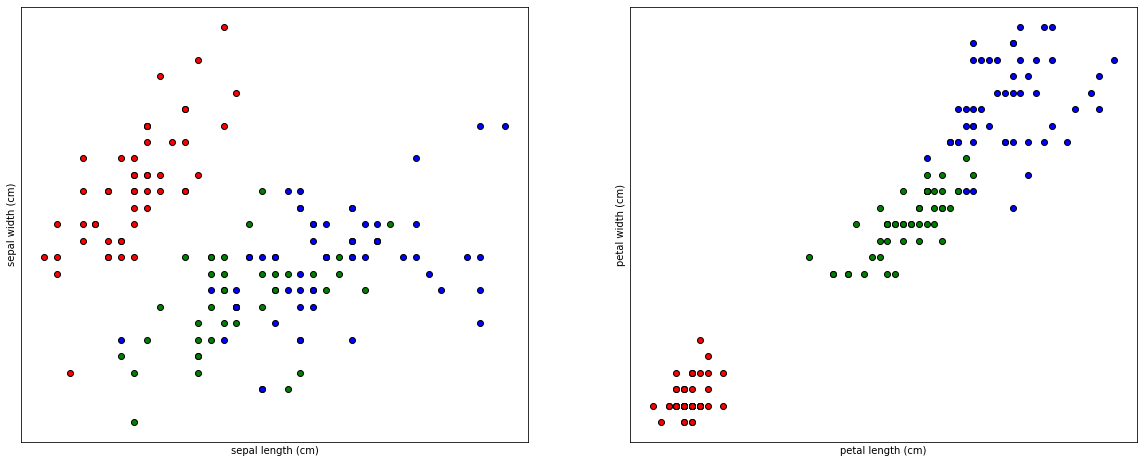

In [89]:
import matplotlib.pyplot as plt

def plot_scatter(X, fig, ax, dim=('C1','C2')):
    colors = ['r', 'g', 'b']
    
    for i, target in enumerate(iris.target_names):
        ax.scatter(
            X[X['target'] == target][dim[0]], 
            X[X['target'] == target][dim[1]],  
            c=colors[i], cmap=plt.cm.Set1, label=target, edgecolor='k')
    
    ax.set_xticks(())
    ax.set_yticks(())

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes_names = [('sepal length (cm)', 'sepal width (cm)'),('petal length (cm)', 'petal width (cm)')]

for i in range(0,2):
    plot_scatter(X, fig, axes[i], dim=axes_names[i])
    
    axes[i].set_xlabel(axes_names[i][0])
    axes[i].set_ylabel(axes_names[i][1])

plt.show()

## Normalization

First we normalize the dataset to avoid the influence of big absolute values on the result. 
Scikit-learn provides a `StandardScaler` to transform each feature value to its 
[Standard Score](https://en.wikipedia.org/wiki/Standard_score).  

In [42]:
from sklearn.preprocessing import StandardScaler

# Normalize dataset
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## PCA

First a simple PCA is performed on the normalized data. This generates 2 Principal Components (PC or C) and places each point
relative to this PC. The result are 2 values for each data point where their combination represents the initial, 
4 dimensional point. The 4 dimensional space was therefor reduced to 2 dimensions which can now be plotted in a 
2D diagram. 

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

X_pca['target'] = y['name']
X_pca.columns = ['C1','C2','target']
X_pca

,C1,C2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


To visualize the data each PC is assigned to one axis (X=>PC1, Y=>PC2) and plotted in a 2D scatter diagram.
As shown below the overall characteristics that could be assumed from the simple 2D diagrams above where preserved.
There is a well defined cluster for setosa, but versicolor and virginica are still hard to distinguish.

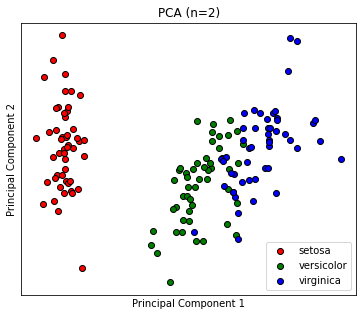

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA (n=2)') 

plot_scatter(X_pca, fig, ax)

plt.legend()
plt.show()

## MDS

**TODO**: 1:1 copy from https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling

In general, MDS is a technique used for analyzing similarity or dissimilarity data. 
It attempts to model similarity or dissimilarity data as distances in a geometric spaces. 
The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

In [53]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_std)
X_mds = pd.DataFrame(X_mds)

X_mds['target'] = y['name']
X_mds.columns = ['C1','C2','target']
X_mds

,C1,C2,target
0,1.806510,-1.470315,setosa
1,0.769788,-2.063229,setosa
2,1.222272,-2.068954,setosa
3,0.980279,-2.186142,setosa
4,2.014128,-1.469130,setosa
...,...,...,...
145,-0.835572,1.757916,virginica
146,-1.719847,0.646031,virginica
147,-0.740561,1.370909,virginica
148,0.220831,1.890770,virginica


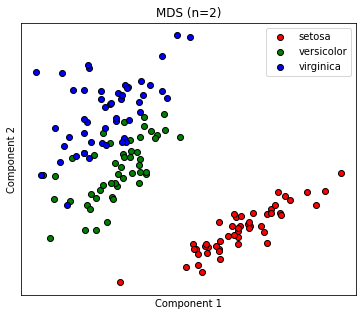

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('MDS (n=2)') 

plot_scatter(X_mds, fig, ax)

plt.legend()
plt.show()

## t-SNE

**TODO**: Copy of https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne

t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented 
by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. 
This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over 
existing techniques:

* Revealing the structure at many scales on a single map
* Revealing data that lie in multiple, different, manifolds or clusters
* Reducing the tendency to crowd points together at the center

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne = pd.DataFrame(X_tsne)

X_tsne['target'] = y['name']
X_tsne.columns = ['C1','C2','target']
X_tsne

,C1,C2,target
0,-14.903111,-17.212658,setosa
1,-12.279347,-14.559594,setosa
2,-12.629495,-15.820038,setosa
3,-11.987300,-15.481236,setosa
4,-15.342081,-17.652678,setosa
...,...,...,...
145,9.975257,7.370159,virginica
146,8.660789,3.351447,virginica
147,9.136271,6.646713,virginica
148,11.686378,7.135748,virginica


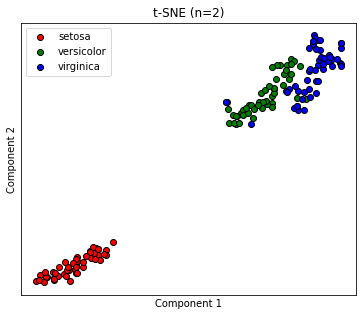

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('t-SNE (n=2)') 

plot_scatter(X_tsne, fig, ax)

plt.legend()
plt.show()